# 파이썬 시각화

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### 시각화 구성도

- figure
- Axes
- Axis

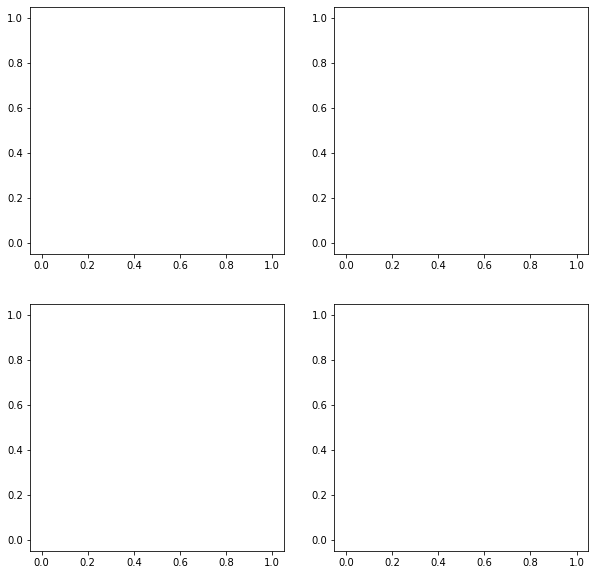

In [8]:
fig , ax = plt.subplots(ncols=2 ,nrows=2 , figsize=(10,10))
ax[0][0].plot()
ax[0][1].plot()
ax[1][0].plot()
ax[1][1].plot()

plt.show()

Text(0.5, 0.98, 'Figure Title')

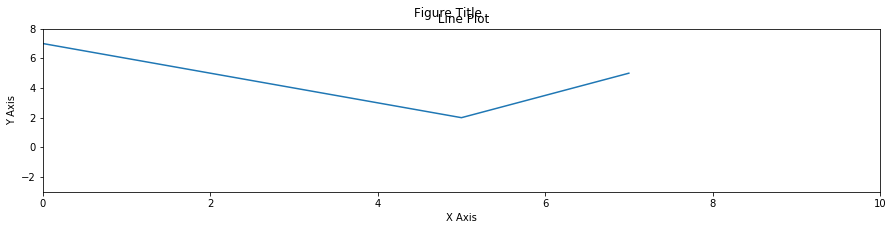

In [18]:
x =  [-3 , 5, 7]
y = [10,2,5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0,10)
plt.ylim(-3,8)

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title(" Line Plot")
plt.suptitle("Figure Title")

Text(0.5, 1.03, 'Figure Title')

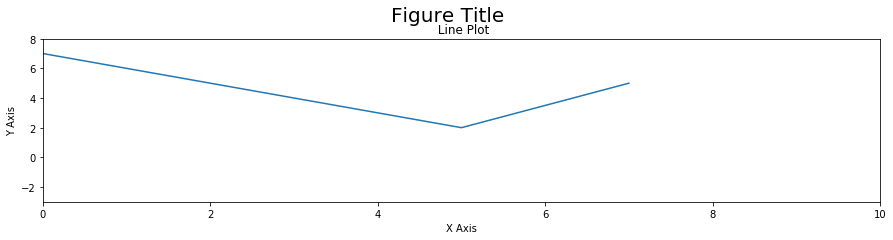

In [19]:
x =  [-3 , 5, 7]
y = [10,2,5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0,10)
plt.ylim(-3,8)

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title(" Line Plot")
plt.suptitle("Figure Title", size=20 , y = 1.03)

- pandas에서 간단한 시각화 실행

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(index=["Atiya", "Abbas", "Cornelia","StepHanie","Monte"],
                 data ={"Apples":[20,10,40,20,50],
                       "Oranges":[35,40,25,19,33]})

In [21]:
color = ["1.2",".7"]

In [22]:
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
StepHanie,20,19
Monte,50,33


- DataFrame의 기본 메서드인 plot을 이용해 Bar / KDE / Scatter 형태의 시각화

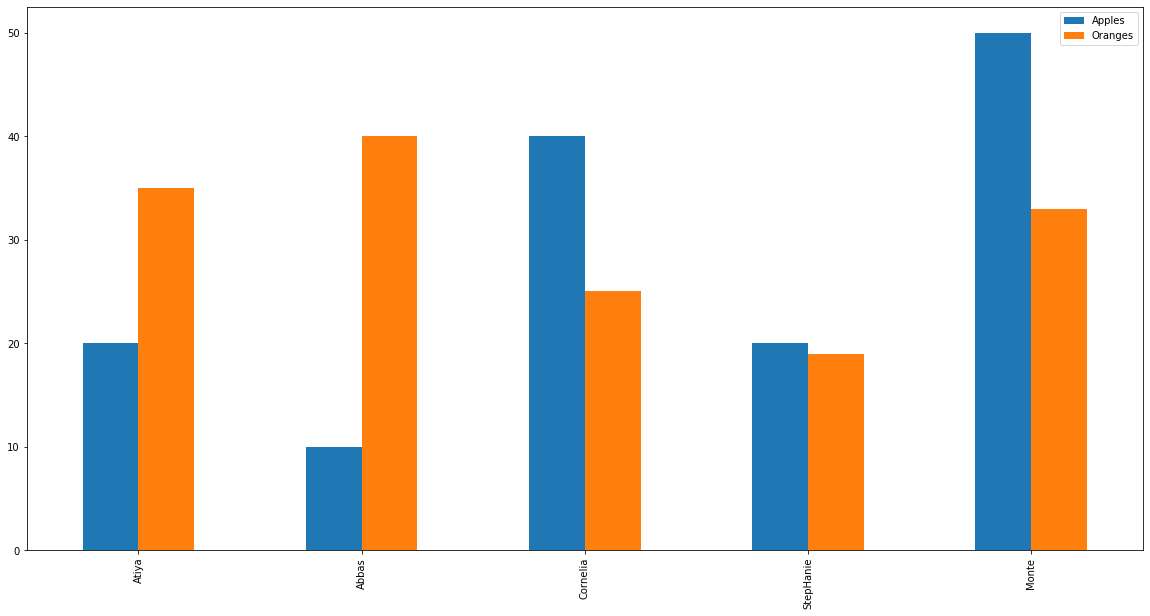

In [23]:
df.plot(kind="bar",figsize=(20,10))

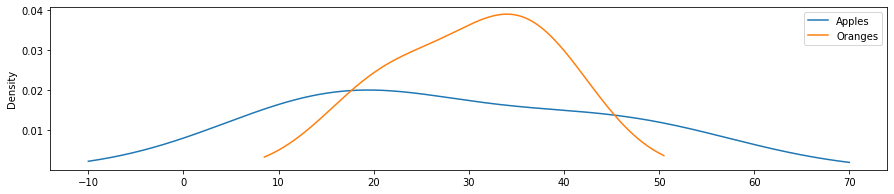

In [24]:
df.plot(kind="kde", figsize=(15,3))

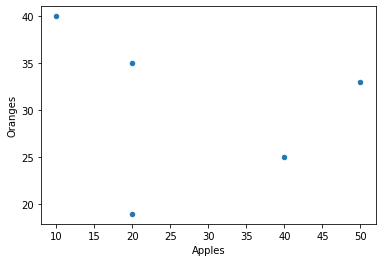

In [26]:
df.plot(kind="scatter",x ="Apples",y="Oranges")

- 단일 변수에 대해서 시각화 사용

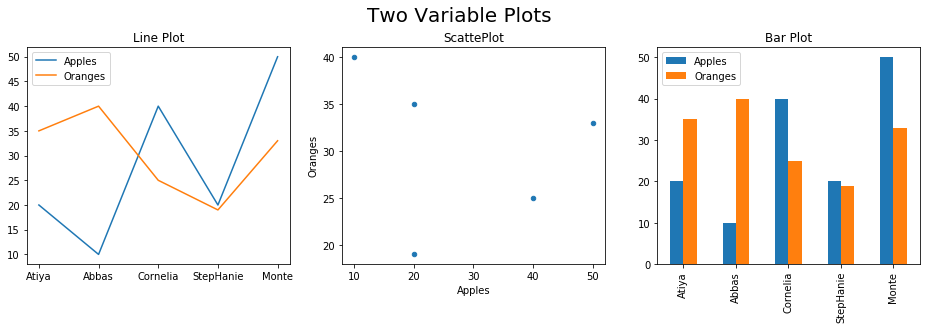

In [28]:
fig , (ax1 ,ax2 , ax3) = plt.subplots(1,3, figsize=(16,4))
fig.suptitle("Two Variable Plots", size=20,y=1.02)
df.plot(kind="line",ax = ax1 , title="Line Plot")
df.plot(x = "Apples", y="Oranges", kind="scatter", ax = ax2 , title="ScattePlot")
df.plot(kind="bar", ax=  ax3 , title="Bar Plot")

- 두개 이상의 변수에 대해서 시각화 사용

In [12]:
import matplotlib.pyplot as plt

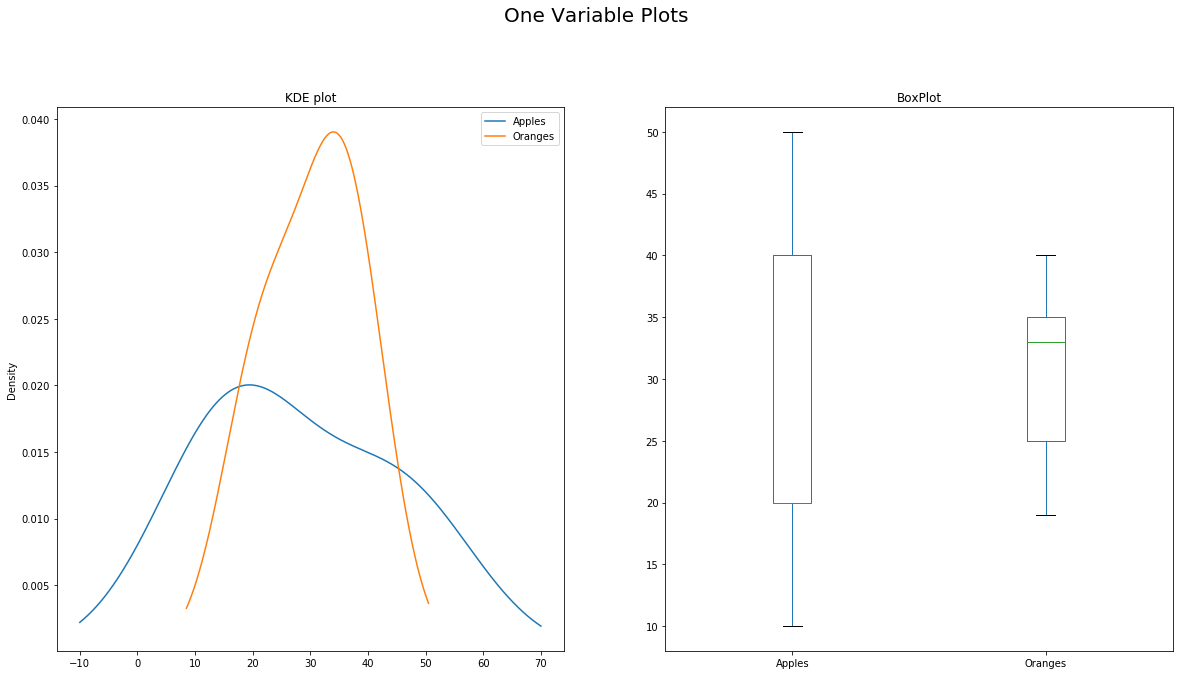

In [13]:
fig,(ax1 ,ax2) = plt.subplots(nrows=1 , ncols=2 , figsize=(20,10))
fig.suptitle("One Variable Plots",size=20,y=1.02)
df.plot(kind="kde", ax = ax1, title ="KDE plot")
df.plot(kind="box", ax= ax2 , title="BoxPlot")

## 특정 데이터 셋을 이용해 시각화

In [14]:
movie = pd.read_csv("./data/movie.csv")

- 각 연도별 영화 예산의 중앙값

In [15]:
med_budget = movie.groupby(["title_year"])["budget"].agg(["median"])

In [16]:
med_budget

,median
title_year,
1916.0,385907.0
1920.0,100000.0
1925.0,245000.0
1927.0,6000000.0
1929.0,379000.0
...,...
2012.0,17000000.0
2013.0,20000000.0
2014.0,15000000.0


In [17]:
med_budget_roll = med_budget.rolling(5,min_periods=1).mean()

In [18]:
med_budget_roll

,median
title_year,
1916.0,3.859070e+05
1920.0,2.429535e+05
1925.0,2.436357e+05
1927.0,1.682727e+06
1929.0,1.421981e+06
...,...
2012.0,2.089300e+07
2013.0,1.989300e+07
2014.0,1.910000e+07


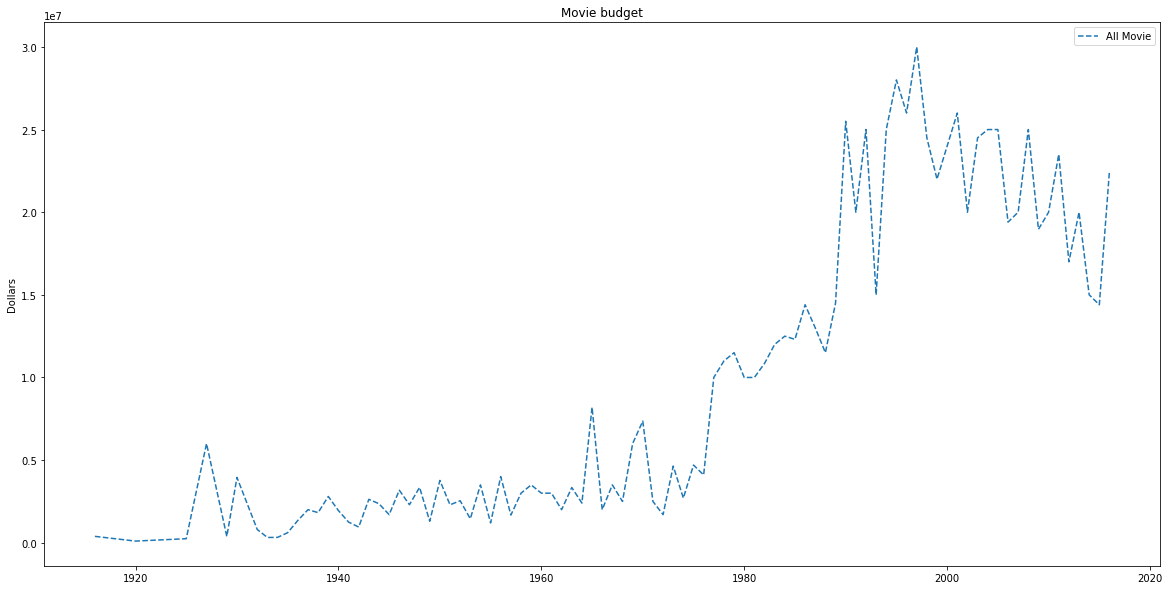

In [20]:
fig , ax = plt.subplots(figsize=(20,10))
ax.plot(med_budget.index , med_budget.values , linestyle="--",label="All Movie")
ax.set_title("Movie budget")
ax.set_ylabel("Dollars")
plt.legend()
plt.show()

/home/beomseok/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/beomseok/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


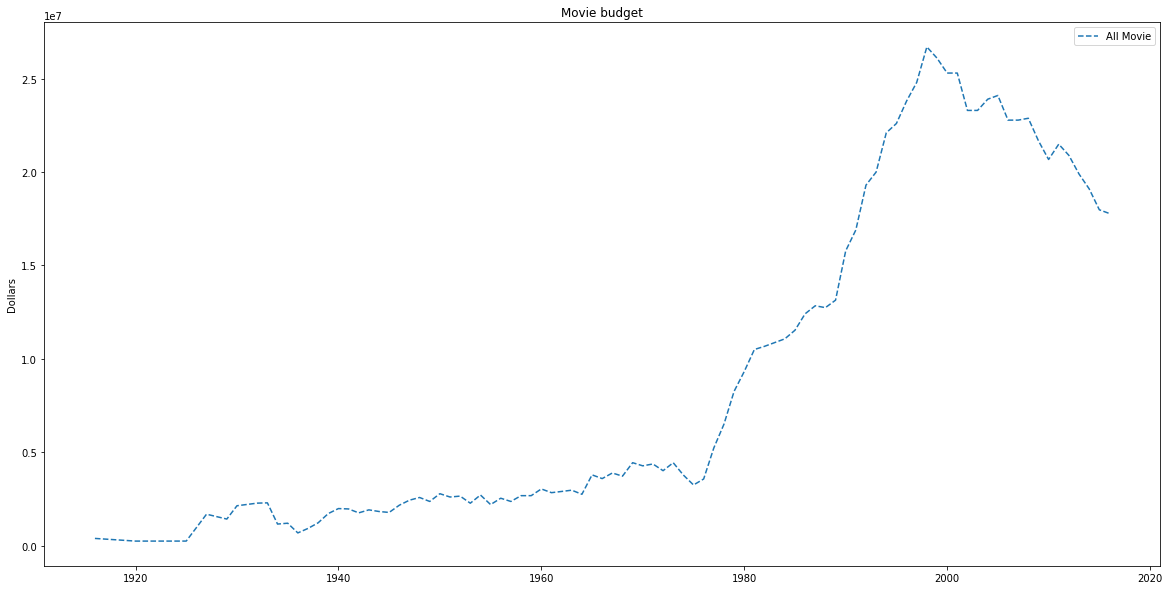

In [19]:
fig , ax = plt.subplots(figsize=(20,10))
ax.plot(med_budget_roll.index , med_budget_roll.values , linestyle="--",label="All Movie")
ax.set_title("Movie budget")
ax.set_ylabel("Dollars")
plt.legend()
plt.show()

- 같은 그림 내에 해당 년도에 만든 영화 건수를 추가

In [22]:
movie_groupby = movie.groupby(["title_year"])["budget"].agg(["median","count"])

In [23]:
movie_groupby

,median,count
title_year,,
1916.0,385907.0,1
1920.0,100000.0,1
1925.0,245000.0,1
1927.0,6000000.0,1
1929.0,379000.0,1
...,...,...
2012.0,17000000.0,191
2013.0,20000000.0,208
2014.0,15000000.0,221


In [24]:
movie_budget_roll = movie_groupby['median'].rolling(window=5).mean()

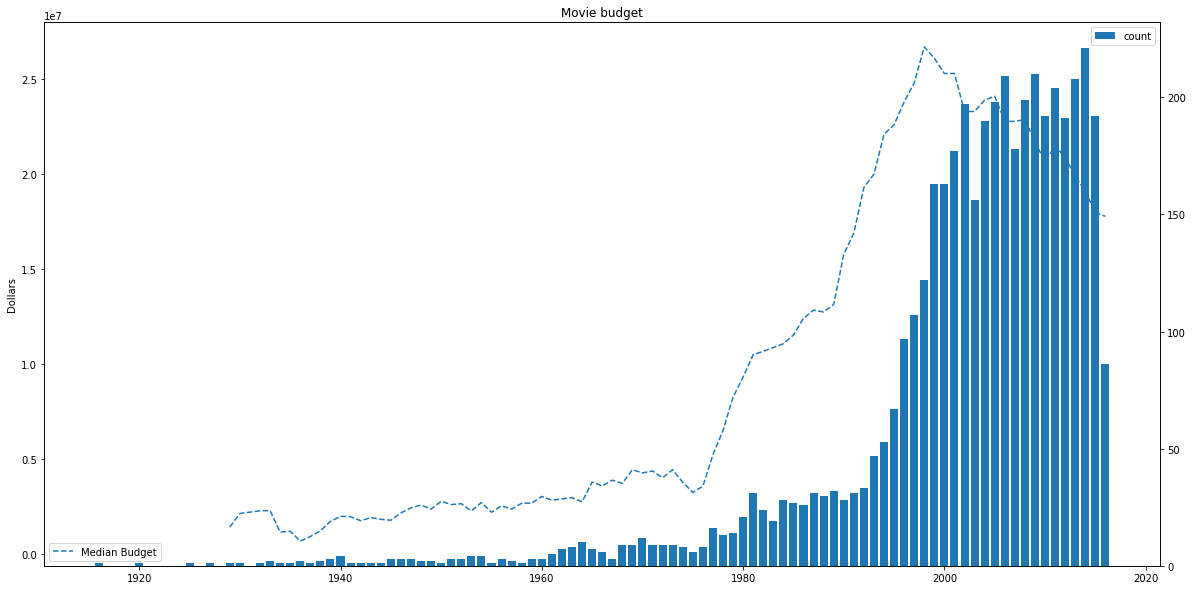

In [27]:
fig ,  ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.plot(movie_budget_roll.index, movie_budget_roll.values , 
         linestyle="--",label="Median Budget")
ax2.bar(movie_groupby.index , movie_groupby["count"] , label="count")


ax1.set_title("Movie budget")
ax1.set_ylabel("Dollars")
ax1.legend(loc="lower left")
ax2.legend()
plt.legend()
plt.show()


In [28]:
import seaborn as sns

/home/beomseok/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
employee = pd.read_csv("./data/employee.csv")

In [31]:
employee.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [32]:
employee["HIRE_DATE"] = pd.to_datetime(employee["HIRE_DATE"])
employee["JOB_DATE"] = pd.to_datetime(employee["JOB_DATE"])

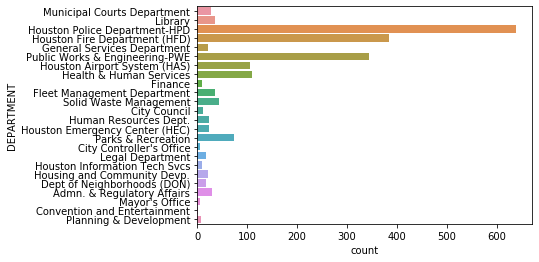

In [33]:
sns.countplot(y="DEPARTMENT",data=employee)

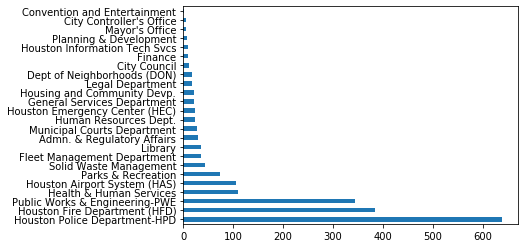

In [35]:
employee["DEPARTMENT"].value_counts().plot(kind="barh")

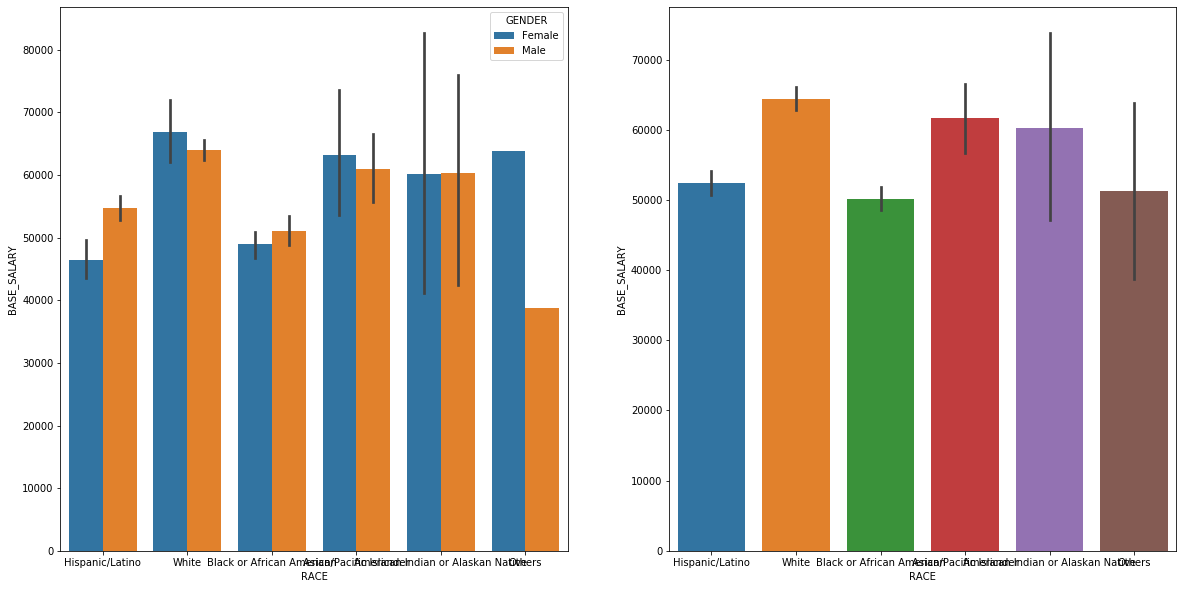

In [51]:
fig ,ax = plt.subplots(nrows=1 , ncols=2 , figsize=(20,10))
sns.barplot(x="RACE" , y="BASE_SALARY", hue = "GENDER",
           data = employee,  ax = ax[0] )
sns.barplot(x="RACE", y="BASE_SALARY",data=employee,ax=ax[1])
plt.show()

In [ ]:
ax = sns.barplot(x="RACE" , y="BASE_SALARY", hue = "GENDER",
           data = employee )
ax.figure.set_size_inches(16,4)

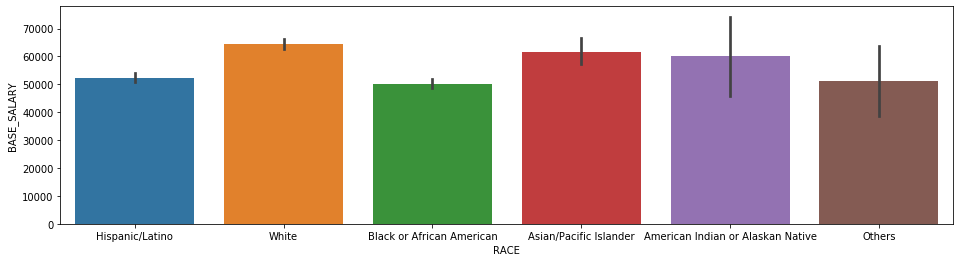

In [37]:
ax = sns.barplot(x="RACE", y="BASE_SALARY",data=employee)
ax.figure.set_size_inches(16,4)

Text(0, 0.5, 'MEAN')

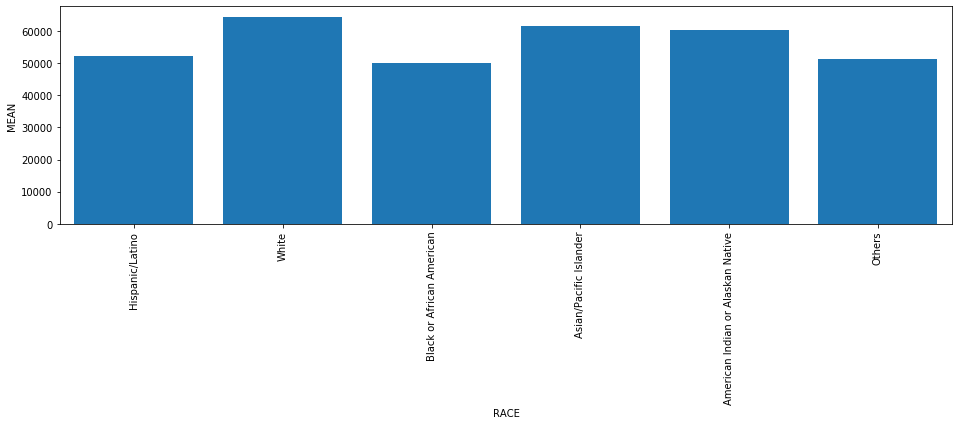

In [41]:
avg_sal = employee.groupby("RACE", sort=False)["BASE_SALARY"].mean()
ax = avg_sal.plot(kind="bar",figsize=(16,4),width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel("MEAN")

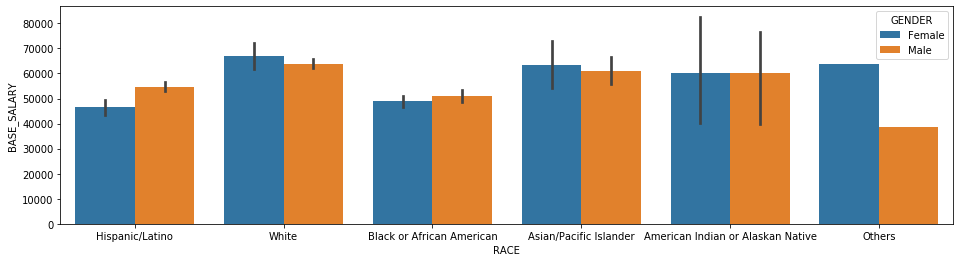

In [44]:
ax = sns.barplot(x="RACE" , y="BASE_SALARY", hue = "GENDER",
           data = employee )
ax.figure.set_size_inches(16,4)

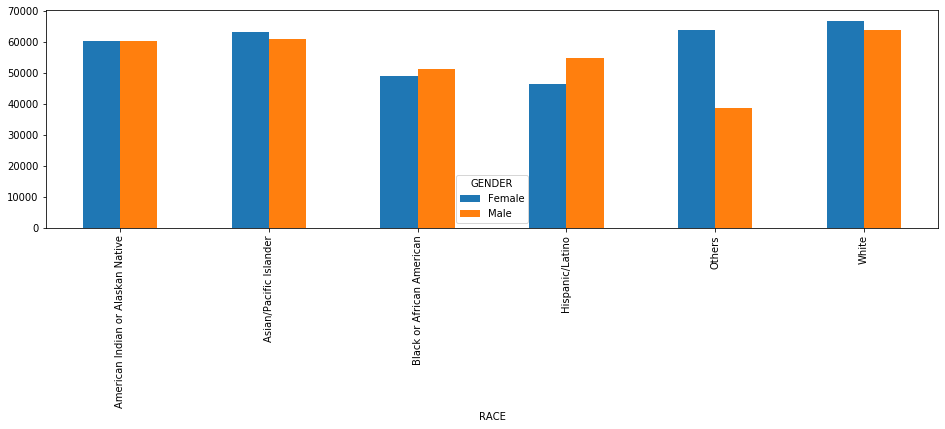

In [46]:
employee.groupby(["RACE","GENDER"])["BASE_SALARY"].mean().unstack("GENDER").plot(kind="bar" ,figsize=(16,4))



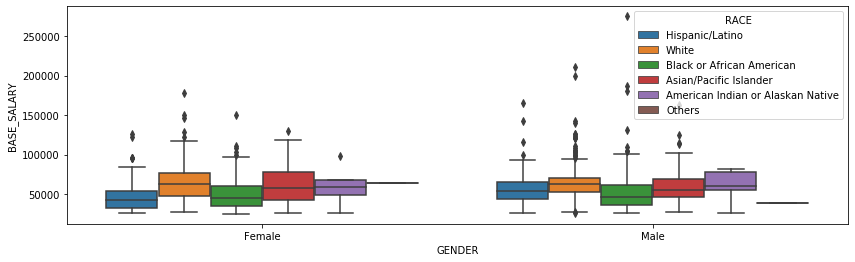

In [50]:
ax = sns.boxplot(x="GENDER" , y="BASE_SALARY", data=employee, hue="RACE")
ax.figure.set_size_inches(14,4)

In [32]:
import pandas as pd

In [33]:
pd.date_range(start="2026-01-02",end="2020-09-15",freq="W")

DatetimeIndex([], dtype='datetime64[ns]', freq='W-SUN')

In [52]:
import pandas as pd

In [58]:
employee["HIRE_DATE"] = pd.to_datetime(employee["HIRE_DATE"])

In [59]:
import datetime

In [71]:
dt = datetime.timedelta(weeks=2, days=5)

In [72]:
dt

datetime.timedelta(days=19)

In [73]:
date

Timestamp('2020-09-16 00:00:00')

In [74]:
dt

datetime.timedelta(days=19)

In [75]:
date - dt

Timestamp('2020-08-28 00:00:00')

In [77]:
from dateutil.relativedelta import relativedeltaa

In [78]:
date - relativedelta(years=3, months=3)

Timestamp('2017-06-16 00:00:00')

In [79]:
date

Timestamp('2020-09-16 00:00:00')

In [80]:
df_order = pd.read_excel("./data/Superstore.xls"
                         ,sheet_name="Orders", dtype="unicode")

In [82]:
df_order["Order Date"] = pd.to_datetime(df_order["Order Date"])

In [87]:
series_1 = df_order.drop_duplicates(subset=["Order ID"]).groupby(["Order Date"])["Order ID"].agg(["count"])

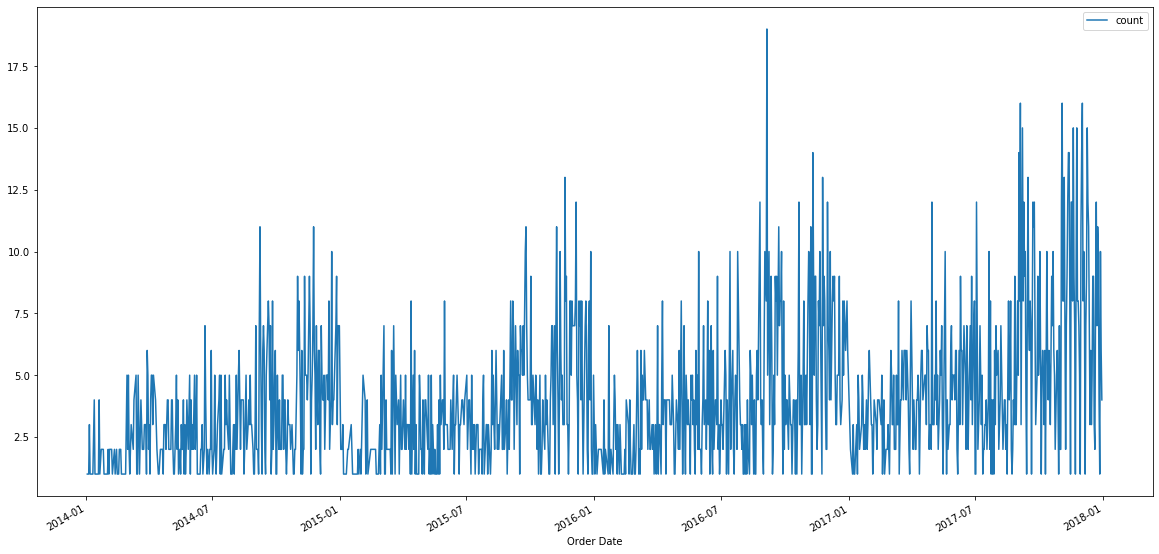

In [88]:
series_1.plot(figsize=(20,10))

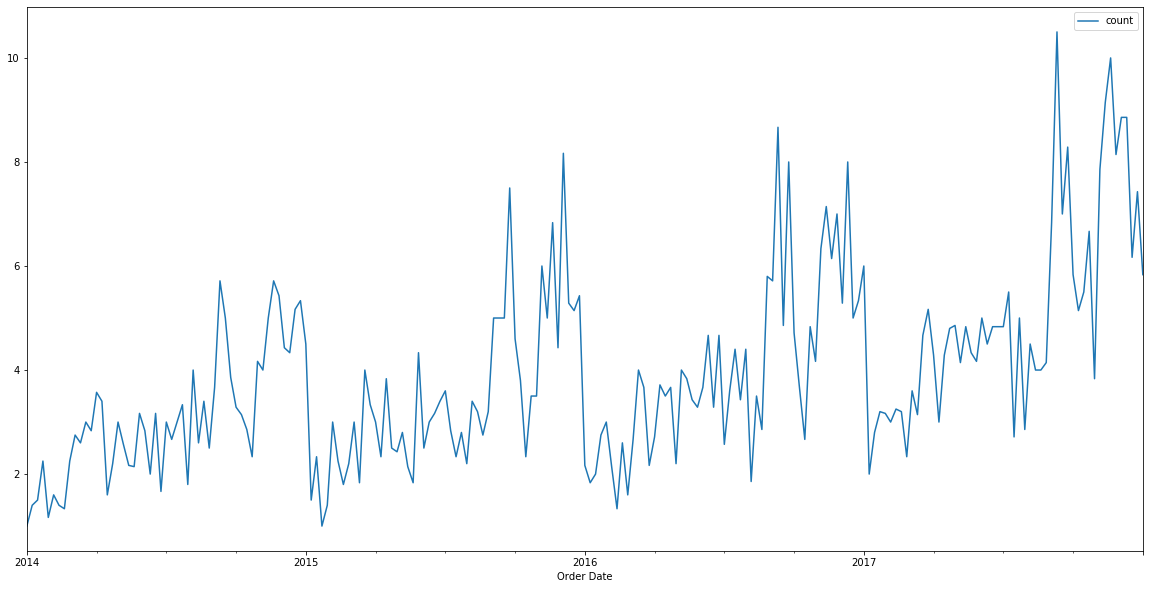

In [89]:
series_1.resample("W").mean().plot(figsize=(20,10))

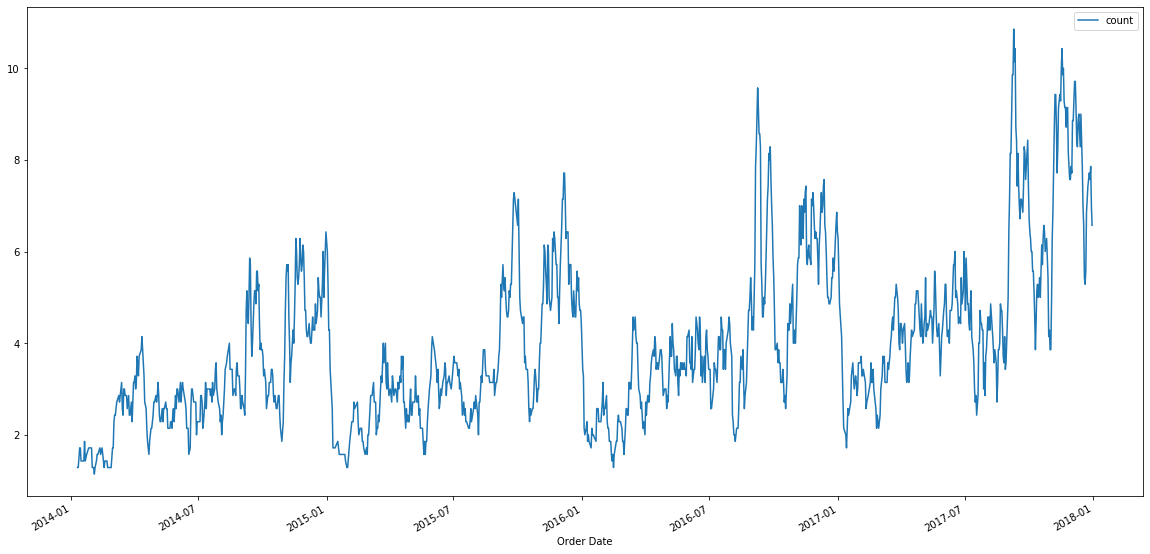

In [92]:
series_1.rolling(window=7).mean().plot(figsize=(20,10))

In [94]:
series_1.loc["2014"]

,count
Order Date,
2014-01-03,1
2014-01-04,1
2014-01-05,1
2014-01-06,3
2014-01-07,1
...,...
2014-12-27,9
2014-12-28,3
2014-12-29,7


In [95]:
series_1.loc["2014-01":"2014-02"]

,count
Order Date,
2014-01-03,1
2014-01-04,1
2014-01-05,1
2014-01-06,3
2014-01-07,1
2014-01-09,1
2014-01-10,1
2014-01-11,1
2014-01-13,4


In [96]:
time_df = series_1.reset_index(drop=False)

In [98]:
df_order["New Order Date"] = df_order[["Row ID","Order Date"]].apply(lambda row :row[1] +  relativedelta(hours=int(row[0])),axis=1)

In [101]:
series_2 = df_order.drop_duplicates(subset=["Order ID"]).groupby(["New Order Date"])["Order ID"].agg(["count"])

In [102]:
series_2

,count
New Order Date,
2014-02-02 17:00:00,1
2014-02-03 20:00:00,1
2014-02-09 21:00:00,1
2014-02-13 20:00:00,1
2014-02-15 02:00:00,1
...,...
2019-01-19 17:00:00,1
2019-01-20 00:00:00,1
2019-01-20 10:00:00,1


In [103]:
series_2.between_time("2:00","5:00")

,count
New Order Date,
2014-02-15 02:00:00,1
2014-03-26 04:00:00,1
2014-03-29 04:00:00,1
2014-04-09 03:00:00,1
2014-04-27 05:00:00,1
...,...
2019-01-02 05:00:00,1
2019-01-04 02:00:00,1
2019-01-06 02:00:00,1


In [104]:
series_2.at_time("2:00")

,count
New Order Date,
2014-02-15 02:00:00,1
2014-05-12 02:00:00,1
2014-07-20 02:00:00,1
2014-07-26 02:00:00,1
2014-08-01 02:00:00,1
...,...
2018-11-27 02:00:00,1
2018-12-03 02:00:00,1
2018-12-06 02:00:00,1


In [105]:
import numpy as np

In [108]:
df_order["Sales"] = df_order["Sales"].astype(np.float)
df_order["Profit"] = df_order["Profit"].astype(np.float)

In [110]:
timeseries_df = df_order.groupby(["Order Date"]).agg({"Sales":"sum","Profit":"sum"})

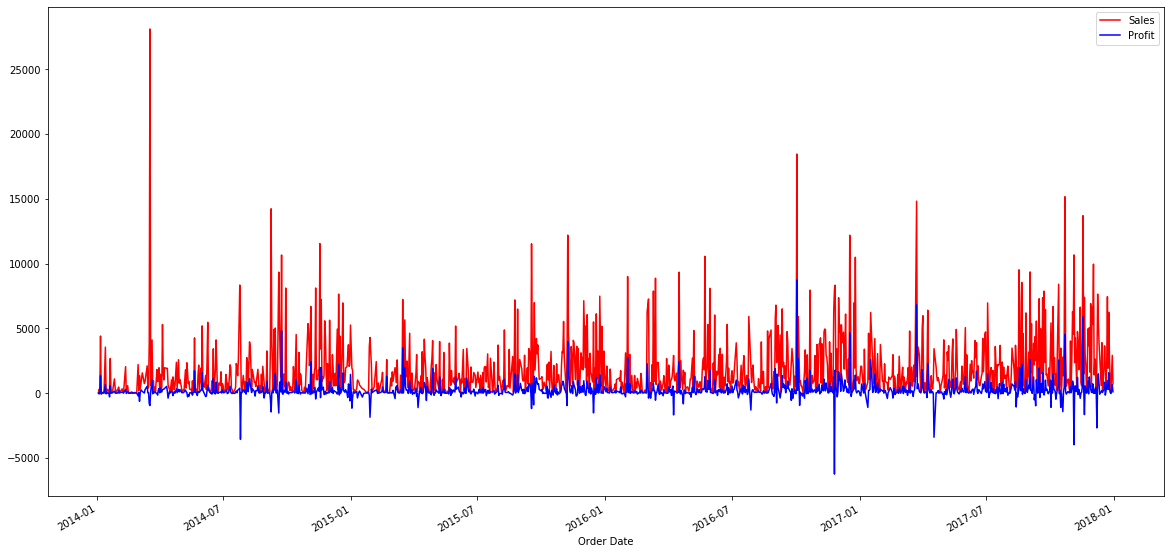

In [111]:
timeseries_df.plot(figsize=(20,10),color=["red","blue"])

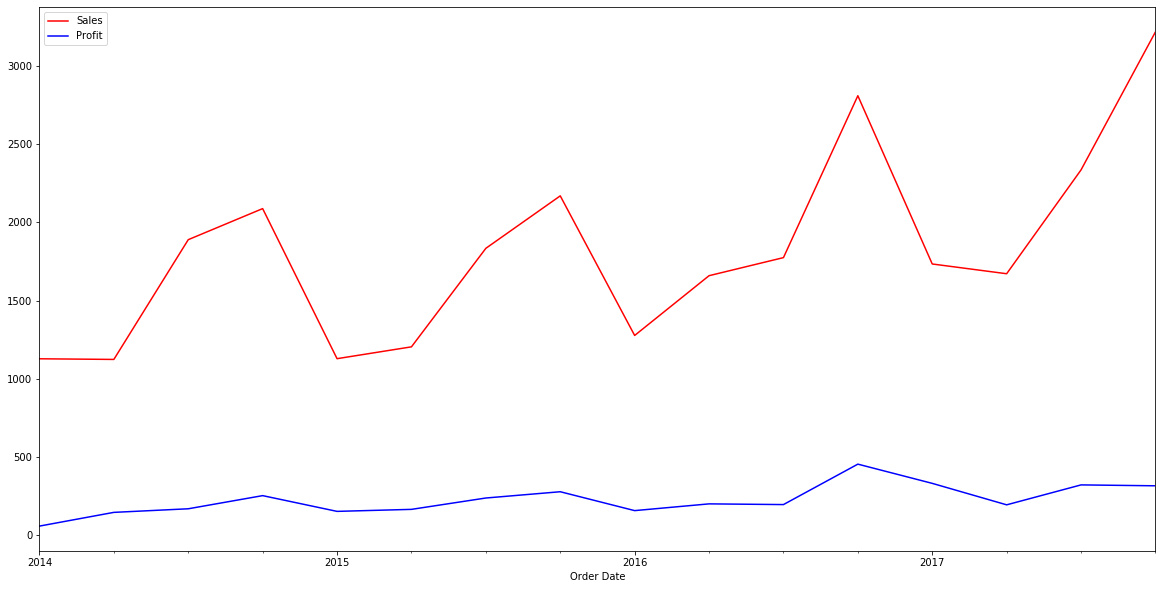

In [112]:
timeseries_df.resample("Q").mean().plot(figsize=(20,10),color=["red","blue"])

In [113]:
series_df = series_1.reset_index(drop=False)

In [114]:
series_df["year"] = series_df["Order Date"].dt.year
series_df["month"] = series_df["Order Date"].dt.month


In [115]:
import seaborn as sns

In [117]:
tmp_df = series_df.pivot_table(index="year", columns="month",values="count",aggfunc=sum)

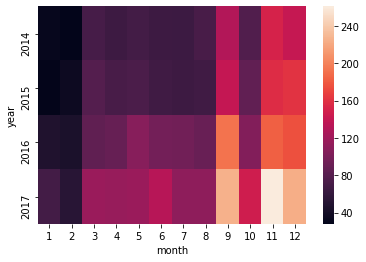

In [118]:
sns.heatmap(tmp_df)

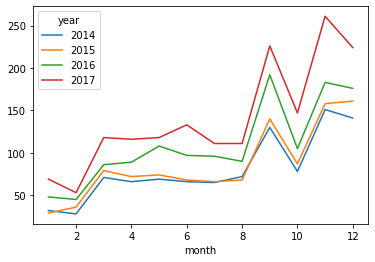

In [119]:
series_df.pivot_table(index="month",columns="year",values="count",aggfunc=sum).plot()

In [120]:
df_movie = pd.read_csv("./data/movie.csv")

In [124]:
pd.crosstab(df_movie["color"].notnull() , df_movie["director_name"].notnull(),normalize=False,margins=True)

director_name,False,True,All
color,,,
False,2,17,19
True,100,4797,4897
All,102,4814,4916
